In [1]:
# import relevant libraries
%matplotlib inline
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

from sklearn import preprocessing

warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('./data/EPL 19-20 player statistics.csv')
pd.set_option('display.max_columns', None)
df

,player_id,position,player,age,team_id,team,foot,total_scoring_att,ontarget_scoring_att,blocked_scoring_att,goals,own_goals,post_scoring_att,total_pass,accurate_pass,total_cross,accurate_cross,total_fwd_zone_pass,accurate_fwd_zone_pass,total_through_ball,accurate_through_ball,goal_assist,ontarget_att_assist,total_att_assist,total_tackle,won_tackle,won_corners,lost_corners,total_offside,fouls,hand_ball,dangerous_play,was_fouled,total_contest,won_contest,saves,interception,total_clearance,effective_clearance,total_claim,good_claim,punches,six_second_violation,back_pass,total_long_balls,accurate_long_balls,passes_right,passes_left,total_high_claim,good_high_claim,total_one_on_one,good_one_on_one,stand_save,dive_save,stand_catch,dive_catch,mins_played,att_sbx_centre,att_sbx_right,att_sbx_left,att_bx_centre,att_bx_right,att_bx_left,att_obx_centre,att_obx_right,att_obx_left,att_lg_centre,att_lg_right,att_lg_left,att_bxd_right,att_bxd_left,att_obxd_right,att_obxd_left,att_sv_high_centre,att_sv_high_right,att_sv_high_left,att_sv_low_centre,att_sv_low_right,att_sv_low_left,att_goal_high_centre,att_goal_high_right,att_goal_high_left,att_goal_low_centre,att_goal_low_left,att_goal_low_right,att_post_high,att_post_left,att_post_right,att_miss_high_right,att_miss_high_left,att_miss_high,att_miss_right,att_miss_left,att_cmiss_high_right,att_cmiss_high_left,att_cmiss_high,att_cmiss_right,att_cmiss_left,att_rf_goal,att_lf_goal,att_hd_goal,att_rf_miss,att_lf_miss,att_hd_miss,att_rf_target,att_lf_target,att_hd_target,att_rf_post,att_lf_post,att_hd_post,att_corner,att_setpiece,att_fastbreak,att_freekick_goal,att_freekick_miss,att_freekick_target,att_freekick_post,att_pen_goal,att_pen_miss,att_pen_target,att_pen_post,att_rf_total,att_lf_total,att_hd_total,att_freekick_total,yellow_card,red_card,penalty_conceded,goals_conceded,clean_sheet,_perm_user,_perm_group,_perm_access,att_ibox_goal,att_ibox_target,att_ibox_miss,att_ibox_post,att_ibox_blocked,att_obox_goal,att_obox_target,att_obox_miss,att_obox_post,att_obox_blocked,att_obp_total,att_obp_goal,att_obp_target,att_obp_miss,att_obp_post,att_obp_blocked,offtarget_att_assist,total_back_zone_pass,accurate_back_zone_pass,last_man_contest,last_man_tackle,outfielder_block,total_sub_on,total_sub_off,total_cross_nocorner,accurate_cross_nocorner,total_corners_intobox,accurate_corners_intobox,clearance_off_line,goals_conceded_ibox,goals_conceded_obox,saved_ibox,saved_obox,saved_setpiece,attempts_conceded_ibox,attempts_conceded_obox,six_yard_block,total_throws,accurate_throws,total_attacking_pass,penalty_save,second_yellow,game_started,head_pass,challenge_lost,aerial_won,aerial_lost,goal_kicks,pen_goals_conceded,accurate_goal_kicks,keeper_throws,accurate_keeper_throws,duel_won,duel_lost,head_clearance,effective_head_clearance,crosses_18yard,crosses_18yardplus,interceptions_in_box,long_pass_own_to_opp,long_pass_own_to_opp_success,ball_recovery,keeper_pick_up,cross_not_claimed,gk_smother,offside_provoked,error_lead_to_shot,error_lead_to_goal,turnover,dispossessed,shot_off_target,touches,final_third_entries,corner_taken,total_launches,accurate_launches,total_layoffs,accurate_layoffs,goal_assist_intentional,penalty_won,total_chipped_pass,accurate_chipped_pass,total_flick_on,accurate_flick_on,shield_ball_oop,foul_throw_in,blocked_cross,effective_blocked_cross,penalty_faced,total_pull_back,accurate_pull_back,total_keeper_sweeper,accurate_keeper_sweeper,goal_assist_openplay,goal_assist_setplay,att_assist_openplay,att_assist_setplay,overrun,interception_won,big_chance_created,big_chance_missed,big_chance_scored,unsuccessful_touch,fwd_pass,backward_pass,leftside_pass,rightside_pass,total_final_third_passes,successful_final_third_passes,rescinded_red_card,second_goal_assist,hit_woodwork,diving_save,goal_fastbreak,shot_fastbreak,poss_won_def_3rd,poss_won_mid_3rd,poss_won_att_3rd,poss_lost_all,poss_lost_ctrl,pen_area_entries,goal_assist_deadball,goals_conc_onfield,shots_conc_onfield,total_fastbreak,att_one_on_one,fouled

In [5]:
# Drop columns
df1 = df.drop(['position', 'player', 'team', 'foot'], axis=1)

In [6]:
x = df1

In [7]:
x = StandardScaler().fit_transform(x)

In [8]:
pca = PCA(n_components=2)

In [9]:
principalComponents = pca.fit_transform(x)

In [10]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal_component_1', 'principal_component_2'])

In [11]:
principalDf

,principal_component_1,principal_component_2
0,9.215638,11.172414
1,-5.434324,10.452845
2,1.872701,9.425396
3,8.112205,10.343809
4,12.558921,-4.069880
...,...,...
564,-9.088758,-2.990612
565,-9.093780,-3.001450
566,-9.137969,-3.107417
567,-9.029262,-2.794730


In [12]:
df[['player']].head()

,player
0,Harry Maguire
1,David de Gea
2,Victor Lindelöf
3,Aaron Wan-Bissaka
4,Daniel James


In [13]:
master_df = pd.concat([principalDf, df[['player']]], axis = 1)
master_df.head(5)

,principal_component_1,principal_component_2,player
0,9.215638,11.172414,Harry Maguire
1,-5.434324,10.452845,David de Gea
2,1.872701,9.425396,Victor Lindelöf
3,8.112205,10.343809,Aaron Wan-Bissaka
4,12.558921,-4.069880,Daniel James


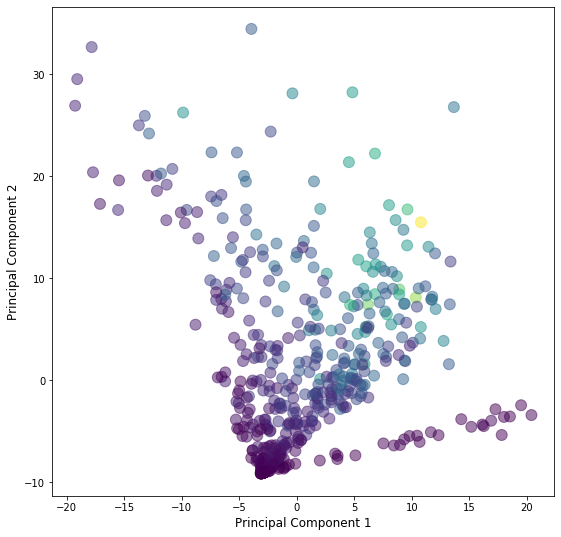

In [14]:
fig, ax = plt.subplots(figsize=(9,9))

v = df['total_tackle']

ax.scatter(master_df['principal_component_2'], master_df['principal_component_1'], s=120, c=v, zorder=2, alpha=0.5)

# Label axis
ax.set_ylabel("Principal Component 2",fontsize=12)
ax.set_xlabel("Principal Component 1",fontsize=12);

# dx, dy = master_df.principal_component_2.values, master_df.principal_component_1.values
# for i in range(len(master_df)):
#     ax.text(dx[i],dy[i]-0.035,master_df.player.iloc[i],ha="center",color="black",zorder=6)
